In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import dataset
dataset = read_csv('/home/shriya/Desktop/ml_assignment1/Pima_Indian_diabetes.csv')

In [3]:
#print no. of 0  values in dataset
dataset2 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of 'zero' Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of 'zero' Values

Pregnancies                 106
Glucose                       5
BloodPressure                32
SkinThickness               215
Insulin                     374
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [4]:
#For Pregnancies
#replacing NaN by median
dataset['Pregnancies'] = dataset['Pregnancies'].fillna(dataset['Pregnancies'].median())

In [5]:
#for negative values, replace by 0
dataset['Pregnancies'] = np.where(dataset['Pregnancies'] < 0, 0, dataset['Pregnancies'])

In [6]:
#FOR GLUCOSE
#find nulls in Glucose

#missing value imputation for Glucose value =0 
dataset.loc[dataset['Glucose'] == 0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,0.0,48.0,9.516736,0.0,24.7,0.140,22.0,0
182,1.0,0.0,74.0,20.000000,23.0,27.7,0.299,21.0,0
342,1.0,0.0,68.0,35.000000,0.0,32.0,0.389,22.0,0
349,5.0,0.0,80.0,32.000000,0.0,41.0,0.346,37.0,1
502,6.0,0.0,68.0,41.000000,0.0,39.0,0.727,41.0,1


In [7]:
#replace 0 values by median
dataset.loc[dataset['Glucose'] == 0, 'Glucose'] = dataset['Glucose'].median()

In [8]:
#replace null values by median
dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].median())

In [9]:
#missing value imputation for BloodPressure
#FOR BLOOD PRESSURE
dataset.loc[dataset['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10.0,115.000000,0.0,0.0,0.0,35.300000,0.134,29.0,0
15,7.0,100.000000,0.0,0.0,0.0,30.000000,0.484,32.0,1
49,7.0,105.000000,0.0,0.0,0.0,0.000000,0.305,24.0,0
60,2.0,84.000000,0.0,0.0,0.0,-1.272125,0.304,21.0,0
81,2.0,74.000000,0.0,0.0,0.0,0.000000,0.102,22.0,0
172,2.0,87.000000,0.0,23.0,0.0,28.900000,0.773,NaN,0
193,11.0,135.000000,0.0,0.0,0.0,52.300000,0.578,40.0,1
222,7.0,119.000000,0.0,0.0,0.0,25.200000,0.209,37.0,0
266,0.0,138.000000,0.0,0.0,0.0,36.300000,0.933,25.0,1
269,2.0,146.000000,0.0,0.0,0.0,27.500000,0.240,28.0,1


In [10]:
#replacing 0 value by median
dataset.loc[dataset['BloodPressure'] == 0, 'BloodPressure'] = dataset['BloodPressure'].median()


In [11]:
#replacing null by median
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(dataset['BloodPressure'].median())

In [12]:
#for negative values, replace by median
dataset['BloodPressure'] = np.where(dataset['BloodPressure'] < 0, dataset['BloodPressure'].median(), dataset['BloodPressure'])

In [13]:
#missing value imputation for SkinThickness
#for nulls
s = dataset['SkinThickness'].value_counts(normalize=True)
print(s)
missing = dataset['SkinThickness'].isnull()
dataset.loc[missing,'SkinThickness'] = np.random.choice(s.index, size=len(dataset[missing]),p=s.values)


 0.000000     0.288204
 32.000000    0.038874
 30.000000    0.036193
 27.000000    0.028150
 28.000000    0.026810
                ...   
 56.000000    0.001340
 63.000000    0.001340
 52.000000    0.001340
 99.000000    0.001340
-1.922851     0.001340
Name: SkinThickness, Length: 70, dtype: float64


In [14]:
#for negative values
dataset['SkinThickness'] = np.where(dataset['SkinThickness'] < 0, dataset['SkinThickness'].median(), dataset['SkinThickness'])


In [15]:
#for zero value
dataset.loc[dataset['SkinThickness'] == 0, 'SkinThickness'] = dataset['SkinThickness'].median()


In [16]:
#missing value imputation for Insulin
#replacing 0 value by median
dataset.loc[dataset['Insulin'] == 0, 'Insulin'] = dataset['Insulin'].median()

In [17]:
#missing value imputation for BMI
#replacing 0 value by median
dataset.loc[dataset['BMI'] == 0, 'BMI'] = dataset['BMI'].median()

In [18]:
#replacing null by median
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].median())

In [19]:
#for negative values, replace by median
dataset['BMI'] = np.where(dataset['BMI'] < 0, dataset['BMI'].median(), dataset['BMI'])

In [20]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,749.000000,768.000000
mean,3.856351,120.638679,72.176639,27.183339,94.652344,32.347473,0.471876,33.761336,0.348958
std,3.388688,30.528168,12.213688,9.308115,105.547598,7.035506,0.331329,12.297409,0.476951
min,0.000000,42.974768,15.372031,7.000000,14.000000,5.317899,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.600000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,127.250000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#imputation for Age
#replace nulls nd NaN
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = dataset.columns
print(scaler.fit(dataset))

# print(scaler.data_max_)

dataset = scaler.transform(dataset)
dataset = pd.DataFrame(dataset, columns=cols)
dataset.describe()

MinMaxScaler(copy=True, feature_range=(0, 1))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226844,0.497765,0.532736,0.219384,0.096938,0.437498,0.168179,0.210726,0.348958
std,0.199335,0.195662,0.114545,0.101175,0.126860,0.113876,0.141473,0.202778,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359078,0.456053,0.173913,0.019832,0.360656,0.070773,0.050000,0.000000
50%,0.176471,0.468035,0.531080,0.173913,0.020733,0.431874,0.125747,0.133333,0.000000
75%,0.352941,0.615447,0.606107,0.271739,0.136118,0.503497,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#EDA
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.673130,0.531080,0.304348,0.019832,0.457772,0.234415,0.483333,1.0
1,0.058824,0.269349,0.474809,0.239130,0.019832,0.344470,0.116567,0.166667,0.0
2,0.470588,0.897452,0.456053,0.173913,0.019832,0.291057,0.253629,0.183333,1.0
3,0.058824,0.294986,0.474809,0.173913,0.096154,0.224370,0.038002,0.000000,0.0
4,0.000000,0.602628,0.230971,0.304348,0.185096,0.611538,0.943638,0.200000,1.0
5,0.294118,0.468035,0.549837,0.173913,0.019832,0.328284,0.052519,0.150000,0.0
6,0.176471,0.224484,0.267259,0.271739,0.088942,0.415688,0.072588,0.083333,1.0
7,0.588235,0.461626,0.531080,0.173913,0.019832,0.485288,0.023911,0.133333,0.0
8,0.117647,0.987182,0.512323,0.413043,0.635817,0.407595,0.034159,0.133333,1.0
9,0.470588,0.525718,0.756162,0.423913,0.019832,0.431874,0.065756,0.793939,1.0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB


In [25]:
dataset.Outcome.unique()

array([1., 0.])

In [26]:
dataset.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

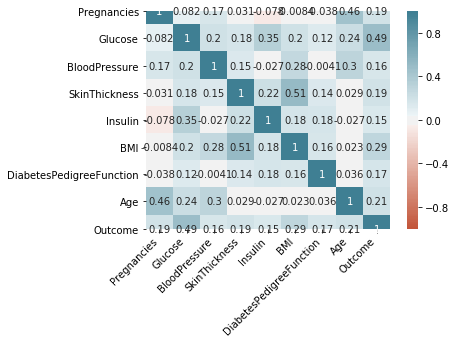

In [27]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#BMI-SkinThickness :0.51
#Glucose-Outcome : 0.49
#Age-Pregnancies : 0.46

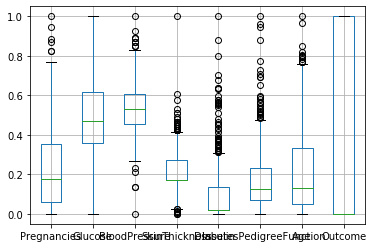

In [28]:
boxplot = dataset.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age','Outcome'])


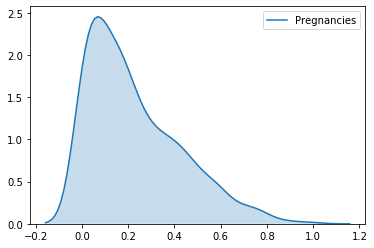

In [29]:
sns.kdeplot(dataset['Pregnancies'], shade=True)

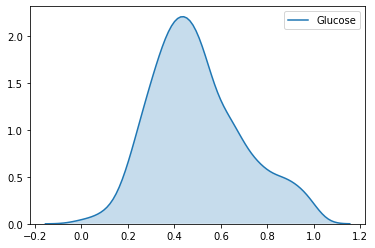

In [30]:
sns.kdeplot(dataset['Glucose'], shade=True)

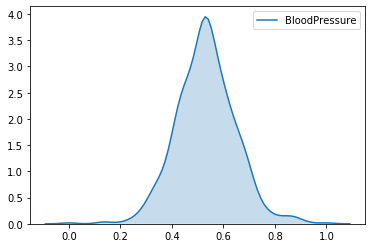

In [31]:
sns.kdeplot(dataset['BloodPressure'], shade=True)
#seems to be normally distributed

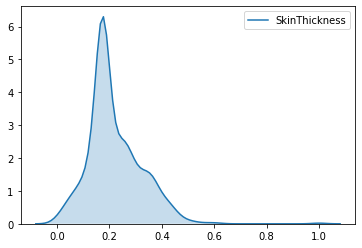

In [32]:
sns.kdeplot(dataset['SkinThickness'], shade=True)

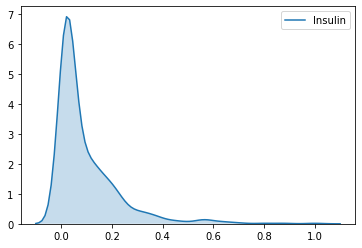

In [33]:
sns.kdeplot(dataset['Insulin'], shade=True)

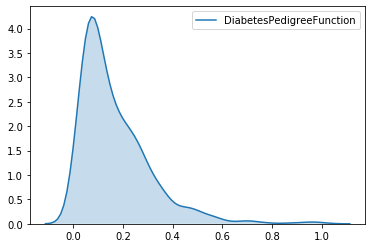

In [34]:
sns.kdeplot(dataset['DiabetesPedigreeFunction'], shade=True)

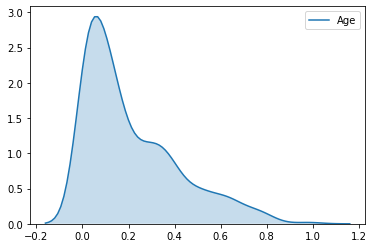

In [35]:
sns.kdeplot(dataset['Age'], shade=True)

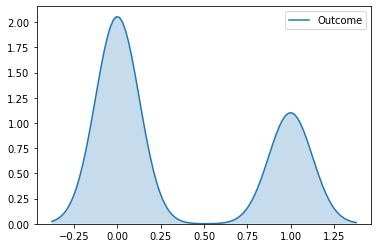

In [36]:
sns.kdeplot(dataset['Outcome'], shade=True)

In [37]:
#X_train, X_test, Y_train, Y_test = train_test_split(dataset, dataset['Outcome'], test_size=0.3)

In [38]:
#print(X_train.shape)
#print (Y_train.shape)
#print (X_test.shape)
#print (Y_test.shape)

In [39]:
#linear regression cant be done
#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, Y_train)
#predictions = lm.predict(X_test)

In [40]:
#plt.scatter(Y_test, predictions)
#plt.xlabel('TrueValues')
#plt.ylabel('Predictions')

In [41]:
#from sklearn.cross_validation import train_test_split

In [42]:
#FEATURE EXTRACTION
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]

In [44]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 4.975 14.239  0.496  1.26   2.806  1.965  2.759  6.443]
[[0.353 0.673 0.02  0.483]
 [0.059 0.269 0.02  0.167]
 [0.471 0.897 0.02  0.183]
 [0.059 0.295 0.096 0.   ]
 [0.    0.603 0.185 0.2  ]]


In [45]:
# Import necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [46]:

model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True False False False  True  True  True]
Feature Ranking: [1 1 3 2 4 1 1 1]


In [98]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 


In [100]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test) 


In [102]:
# making confusion matrix between 
# test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


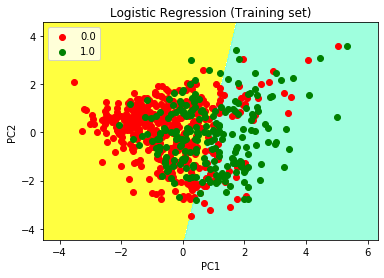

In [103]:
# Predicting the training set 
# result through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
					stop = X_set[:, 0].max() + 1, step = 0.01), 
					np.arange(start = X_set[:, 1].min() - 1, 
					stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
			cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 

# show scatter plot 
plt.show() 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


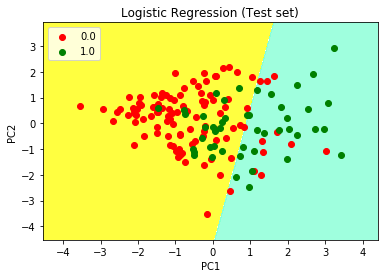

In [104]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_test, y_test 

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
					stop = X_set[:, 0].max() + 1, step = 0.01), 
					np.arange(start = X_set[:, 1].min() - 1, 
					stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
			cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

# title for scatter plot 
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 

# show scatter plot 
plt.show() 


In [47]:
#LOGISTIC REGRESSION..

In [48]:
feature_list=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=dataset[feature_list]
y=dataset['Outcome']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [50]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [51]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[100,   7],
       [ 21,  26]])

Text(0.5, 257.44, 'Predicted label')

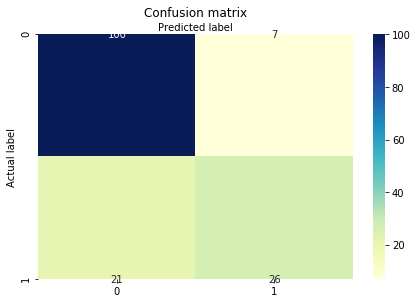

In [52]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8181818181818182
Precision: 0.7878787878787878
Recall: 0.5531914893617021


In [95]:
#RANDOM FOREST..
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=37)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [96]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


In [56]:
#Decision Tree
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [57]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7402597402597403

In [59]:
#KNN
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=24)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8376623376623377


In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8376623376623377


In [61]:
#SVM
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7922077922077922
Precision: 0.7272727272727273
Recall: 0.5106382978723404


In [63]:
#NN
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)


In [64]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(8, activation='relu', input_shape=(8,)))

# Add one hidden layer 
model.add(Dense(4, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [65]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
614/614 [==============================] - 2s 3ms/step - loss: 0.6606 - acc: 0.6287
Epoch 2/20
614/614 [==============================] - 1s 926us/step - loss: 0.5776 - acc: 0.6759
Epoch 3/20
614/614 [==============================] - 1s 913us/step - loss: 0.5379 - acc: 0.7166
Epoch 4/20
614/614 [==============================] - 1s 941us/step - loss: 0.5148 - acc: 0.7459
Epoch 5/20
614/614 [==============================] - 1s 941us/step - loss: 0.4964 - acc: 0.7541
Epoch 6/20
614/614 [==============================] - 1s 942us/step - loss: 0.4806 - acc: 0.7671
Epoch 7/20
614/614 [==============================] - 1s 1ms/step - loss: 0.4691 - acc: 0.7785
Epoch 8/20
614/614 [==============================] - 1s 941us/step - loss: 0.4579 - acc: 0.7899
Epoch 9/20
614/614 [==============================] - 1s 977us/step - loss: 0.4512 - acc: 0.7850
Epoch 10/20
614/614 [=============

In [66]:

y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

154/154 [==============================] - 0s 454us/step
[0.4442939212569943, 0.7987013010235576]


In [67]:
# Model output shape
model.output_shape


(None, 1)

In [68]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Model config
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'cl

In [70]:
# List all weight tensors 
model.get_weights()

[array([[ 0.714, -0.142,  0.029, -0.52 ,  0.189,  0.149, -0.134, -0.953],
        [ 0.525, -0.781, -0.445, -0.889, -0.761, -0.166,  0.394,  0.539],
        [ 0.148, -0.338, -0.26 ,  0.411,  0.039, -0.188,  0.57 , -0.571],
        [-0.087,  0.055,  0.342,  0.098, -0.595, -0.859,  0.22 ,  0.646],
        [ 0.238, -0.2  ,  0.351,  0.421, -0.973,  0.363, -0.567,  0.024],
        [ 0.234, -0.912,  0.195, -0.036,  0.011, -0.582,  0.186,  0.439],
        [ 0.47 , -0.213, -0.106, -0.275, -0.67 ,  0.303,  0.192, -0.495],
        [-0.539,  0.592, -0.681, -1.028, -0.41 , -0.733,  0.097, -0.17 ]],
       dtype=float32),
 array([ 0.022,  0.128,  0.021,  0.232,  0.292,  0.042,  0.04 , -0.035],
       dtype=float32),
 array([[-0.315,  0.352, -0.579,  0.373],
        [ 0.777,  0.017,  0.645,  0.222],
        [ 0.41 , -0.763,  0.501, -0.544],
        [ 1.028, -0.582, -0.328,  0.447],
        [ 0.388,  0.135, -0.747, -0.947],
        [ 0.334,  0.107,  0.296, -0.777],
        [-0.178, -0.328, -0.15 ,  0.